<h2 style='color:orange' align='center'>Analyse de Sentiment avec Electra et Bird sur le Dataset IMDB.</h2>

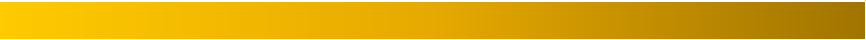

<h3 style='color:brown' align='center'>Partie I: Mettre en œuvre un modèle d'analyse de sentiment avec Electra sur le dataset IMDB.</h3>

* **1. Chargement et Exploration du Dataset :**

In [1]:
import tensorflow as tf

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data()


print("Exemple de critique:")
print(train_data[0])
print("Étiquette de sentiment:")
print(train_labels[0])

17464789/17464789 [==============================] - 2s 0us/step
Exemple de critique:
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 1

* **2. Prétraitement des Données :**

In [2]:
# Convertir les séquences en texte
train_text = [' '.join(map(str, review)) for review in train_data]
test_text = [' '.join(map(str, review)) for review in test_data]

# Séparer le jeu de données
from sklearn.model_selection import train_test_split

train_text, val_text, train_labels, val_labels = train_test_split(train_text, train_labels, test_size=0.2)


* **3. Chargement du Tokenizer et du Modèle Electra :**

In [ ]:
from transformers import ElectraTokenizer, TFElectraForSequenceClassification

# Charger le tokenizer et le modèle Electra
tokenizer = ElectraTokenizer.from_pretrained("google/electra-base-discriminator")
model = TFElectraForSequenceClassification.from_pretrained("google/electra-base-discriminator")


tokenizer_config.json:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some layers from the model checkpoint at google/electra-base-discriminator were not used when initializing TFElectraForSequenceClassification: ['discriminator_predictions']
- This IS expected if you are initializing TFElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


* **4. Tokenisation et Encodage :**

In [ ]:
# Tokeniser et encoder les séquences de texte
train_encodings = tokenizer(train_text, truncation=True, padding=True)
val_encodings = tokenizer(val_text, truncation=True, padding=True)
test_encodings = tokenizer(test_text, truncation=True, padding=True)

# Créer des datasets TensorFlow
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
))


* **5. Construction du Modèle :**

In [ ]:
# compiler le modèle
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

* **6. Entraînement du Modèle :**

In [ ]:
# Entraîner le modèle
model.fit(train_dataset.shuffle(1000).batch(8), epochs=3, validation_data=val_dataset.shuffle(1000).batch(8))

Epoch 1/3
2500/2500 [==============================] - 2630s 1s/step - loss: 0.6967 - accuracy: 0.4961 - val_loss: 0.6950 - val_accuracy: 0.4992
Epoch 2/3
2500/2500 [==============================] - 2593s 1s/step - loss: 0.6955 - accuracy: 0.4936 - val_loss: 0.6955 - val_accuracy: 0.5008
Epoch 3/3
2500/2500 [==============================] - 2593s 1s/step - loss: 0.6958 - accuracy: 0.5024 - val_loss: 0.6933 - val_accuracy: 0.5008


* **7. Évaluation du Modèle :**

In [ ]:
# Évaluer le modèle sur le jeu de test
test_loss, test_accuracy = model.evaluate(test_dataset.batch(8))
print(f"Test Accuracy: {test_accuracy}")

3125/3125 [==============================] - 1025s 328ms/step - loss: 0.6934 - accuracy: 0.5000
Test Accuracy: 0.5


---
---
---

<h3 style='color:brown' align='center'>Partie II : Mettre en œuvre un modèle d'analyse de sentiment en utilisant le modèle BERT pré-entraîné sur le dataset IMDB.</h3>

* **3. Chargement du Tokenizer et du Modèle Bert :**

In [3]:
from transformers import BertTokenizer, TFBertForSequenceClassification

# Charger le tokenizer et le modèle BERT
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


* **4. Tokenisation et Encodage :**

In [4]:
# Tokeniser et encoder les séquences de texte
train_encodings_bert = bert_tokenizer(train_text, truncation=True, padding=True)
val_encodings_bert = bert_tokenizer(val_text, truncation=True, padding=True)
test_encodings_bert = bert_tokenizer(test_text, truncation=True, padding=True)

# Créer des datasets TensorFlow
train_dataset_bert = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_bert),
    train_labels
))

val_dataset_bert = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_bert),
    val_labels
))

test_dataset_bert = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_bert),
    test_labels
))


In [5]:
# Convertir les labels en catégories
train_labels_cat = tf.keras.utils.to_categorical(train_labels, num_classes=2)
val_labels_cat = tf.keras.utils.to_categorical(val_labels, num_classes=2)
test_labels_cat = tf.keras.utils.to_categorical(test_labels, num_classes=2)

# Créer des datasets TensorFlow avec les labels catégoriels
train_dataset_bert_cat = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_bert),
    train_labels_cat
))

val_dataset_bert_cat = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_bert),
    val_labels_cat
))

test_dataset_bert_cat = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_bert),
    test_labels_cat
))


* **5. Construction du Modèle :**

In [6]:
# Construire le modèle BERT
model_bert = tf.keras.Sequential([
    bert_model,
])

* **6. Compilation du Modèle :**

In [7]:
# Compiler le modèle BERT
model_bert.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

* **7. Entrainement du Modèle :**

In [8]:
# Entraîner le modèle BERT
history_bert = model_bert.fit(
    train_dataset_bert_cat.shuffle(1000).batch(8),
    epochs=3,
    validation_data=val_dataset_bert_cat.shuffle(1000).batch(8)
)

Epoch 1/3
2500/2500 [==============================] - 2638s 1s/step - loss: 0.7009 - accuracy: 0.4957 - val_loss: 0.6963 - val_accuracy: 0.5042
Epoch 2/3
2500/2500 [==============================] - 2581s 1s/step - loss: 0.6940 - accuracy: 0.4938 - val_loss: 0.6938 - val_accuracy: 0.5042
Epoch 3/3
2500/2500 [==============================] - 2580s 1s/step - loss: 0.6940 - accuracy: 0.4956 - val_loss: 0.6990 - val_accuracy: 0.5042


* **8. Evaluation du Modèle :**

In [10]:
# Évaluer le modèle sur l'ensemble de test
results_bert = model_bert.evaluate(test_dataset_bert_cat.batch(8), verbose=2)
print("Accuracy du modèle BERT sur l'ensemble de test:", results_bert[1])


3125/3125 - 1024s - loss: 0.6981 - accuracy: 0.5000 - 1024s/epoch - 328ms/step
Accuracy du modèle BERT sur l'ensemble de test: 0.5


In [12]:
import numpy as np
from sklearn.metrics import f1_score, recall_score
# Prédire les labels sur le jeu de test
test_predictions_bert_probs = model_bert.predict(test_dataset_bert_cat.batch(8))
test_logits = test_predictions_bert_probs.logits
test_predictions_bert = tf.argmax(test_logits, axis=1)

# Convertir les labels catégoriels en labels binaires
test_labels_binary = np.argmax(test_labels_cat, axis=1)

# Calculer et afficher les métriques
f_score_bert = f1_score(test_labels_binary, test_predictions_bert, average='binary')
recall_bert = recall_score(test_labels_binary, test_predictions_bert, average='binary')

print("F-score du modèle BERT:", f_score_bert)
print("Recall du modèle BERT:", recall_bert)



3125/3125 [==============================] - 1026s 328ms/step
F-score du modèle BERT: 0.6666666666666666
Recall du modèle BERT: 1.0


---
---
---

<h2 style='color:orange' align='center'>Fin</h2>

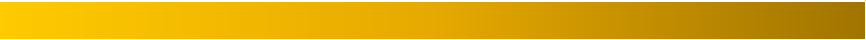